In [1]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
data_folder = os.path.join('..', 'data')
file_name = "Data"

## Simple match rating

The task is to calculate the matchratings for matches between two teams. 

In [2]:
# Only run to update data file
leagues = ["E0", "E1", "E2", "E3"]
start_year, end_year = 2005, 2024
util.fetch_data_into_file(
    data_folder=data_folder,
    file_name=file_name,
    start_year=start_year,
    end_year=end_year,
    leagues=leagues,
)

Data fetched and saved to ../data/Data.csv


In [3]:
data = util.load_data(data_folder, file_name)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38422,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,4.0,11.0,12.0,7.0,5.0,2.0,1.0,0.0,1.0,2324
38423,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,12.0,10.0,13.0,3.0,9.0,2.0,2.0,0.0,0.0,2324
38424,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,4.0,13.0,9.0,2.0,8.0,0.0,2.0,0.0,0.0,2324
38425,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,6.0,5.0,12.0,7.0,7.0,1.0,0.0,0.0,0.0,2324


In [4]:
# cleaned data
clean_data = util.get_cleaned_data(data)
clean_data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38415,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,4.0,11.0,12.0,7.0,5.0,2.0,1.0,0.0,1.0,2324
38416,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,12.0,10.0,13.0,3.0,9.0,2.0,2.0,0.0,0.0,2324
38417,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,4.0,13.0,9.0,2.0,8.0,0.0,2.0,0.0,0.0,2324
38418,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,6.0,5.0,12.0,7.0,7.0,1.0,0.0,0.0,0.0,2324


### Generating the match rating
Now the match rating is calculated by the following formula:
 * sum up the goal difference of the last 6 matches for each team and do the following:
  * Home_team_goal_difference - Away_team_goal_difference = match_rating

This is done for every season and every leauge in the dataset. This i done to ensure that the matchrating only is based on the last 6 matched of the respective season and leauge. Some matches in each season and leauge will be skipped since to calculate the matchrating a team must have played at least 6 matches in the season and leauge.


In [5]:
data_matchrating = util.generate_matchrating_for_each_season_and_league(clean_data)
data_matchrating

Skipped 52 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 61 matches due to insufficient previous matches.
Skipped 51 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 53 matches due to insufficient previous matches.
Skipped 61 matches due to insufficient previous matches.
Skipped 62 matches due to insufficient previous matches.
Skipped 61 matches due to insufficient previous matches.
Skipped 51 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 62 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 53 matches due to insufficient previous matches.
Skipped 60 matches due to insuf

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HR,AR,Season,Home Goals Last 5,Away Goals Last 5,Home Conceded Last 5,Away Conceded Last 5,Home Goal Difference Last 5,Away Goal Difference Last 5,Matchrating
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,0.0,0.0,0506,None,None,None,None,None,None,None
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,0.0,0.0,0506,None,None,None,None,None,None,None
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,0.0,0.0,0506,None,None,None,None,None,None,None
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,0.0,0.0,0506,None,None,None,None,None,None,None
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,1.0,0.0,0506,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38415,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,0.0,1.0,2324,8.0,18.0,10.0,4.0,-2.0,14.0,-16.0
38416,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,0.0,0.0,2324,16.0,13.0,15.0,10.0,1.0,3.0,-2.0
38417,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,0.0,0.0,2324,6.0,12.0,8.0,12.0,-2.0,0.0,-2.0
38418,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,0.0,0.0,2324,9.0,5.0,10.0,10.0,-1.0,-5.0,4.0


Now we can have a look at the different matchratings in the dataset.

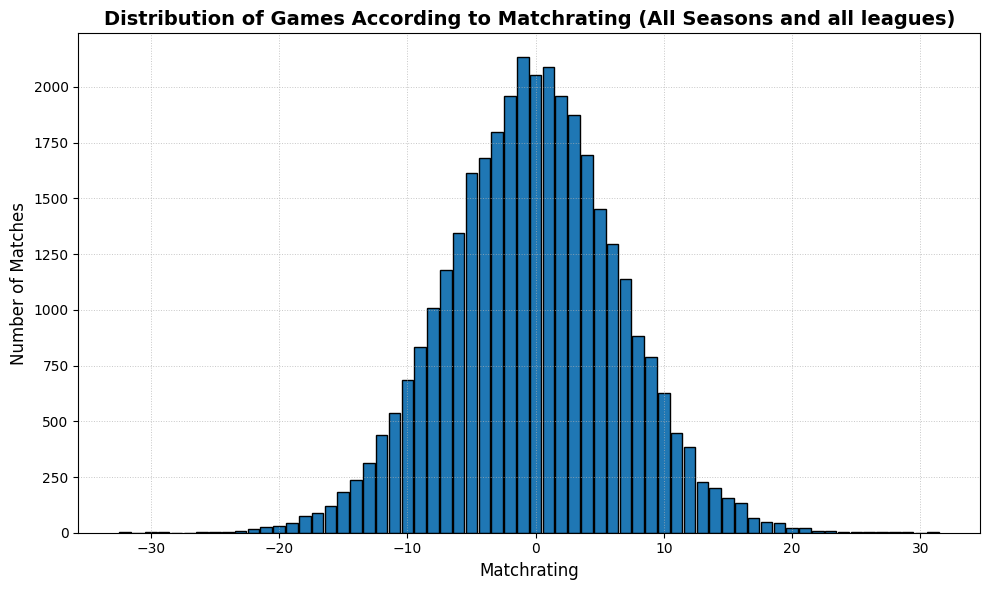

In [6]:
# Plot the histogram for all seasons combined
data_matchrating = data_matchrating.copy()
data_with_matchrating_for_every_match = data_matchrating["Matchrating"].dropna()

util.plot_histogram(
    data_with_matchrating_for_every_match,
    figsize=(10, 6),
    title="Distribution of Games According to Matchrating (All Seasons and all leagues)",
    xlabel="Matchrating",
    ylabel="Number of Matches",
)

Further we can have a look at the percentage of home wins, draws and away wins for the different matchratings.

In [7]:
outcome_percentages = util.calculate_outcome_percentages(data_matchrating)

# Display the resulting DataFrame
outcome_percentages

Outcome,Home Wins %,Draw %,Away Wins %,Number of Away Wins,Number of Draws,Number of Home Wins
Matchrating,,,,,,
-32.0,0.000000,0.000000,100.000000,1,0,0
-30.0,0.000000,0.000000,100.000000,1,0,0
-29.0,100.000000,0.000000,0.000000,0,0,1
-26.0,0.000000,0.000000,100.000000,3,0,0
-25.0,0.000000,0.000000,100.000000,3,0,0
-24.0,0.000000,0.000000,100.000000,5,0,0
-23.0,14.285714,42.857143,42.857143,3,3,1
-22.0,5.882353,11.764706,82.352941,14,2,1
-21.0,14.814815,25.925926,59.259259,16,7,4


As one can see in the data above 44.5 % of the matches with a matchrating of o ended in a home wins. This gives interesting information about the home advantage in football matches. 